In [351]:
import numpy as np
import pygmt
import xarray as xr
from numpngw import write_png

In [362]:
def parse_structures(filename):
    with open(filename) as fh:
        lines = [line.strip() for line in fh.readlines()]

    x0 = 0
    y0 = 0
    nx = 1000
    ny = 1000

    list_of_structures = []
    for line in lines:
        structure = []
        points = line.split('->')
        for point in points:
            coordstr = point.split(',')
            coord = (int(coordstr[0])-x0, int(coordstr[1])-y0) 
            structure.append(coord)
        list_of_structures.append(structure)
    return list_of_structures

def structure_to_grid(l, add_floor=False):
    grid = np.zeros((1000,1000))
    for structure in l:
        for ipoint in range(1,len(structure)):
            p0 = structure[ipoint-1]
            p1 = structure[ipoint]
            grid[p0] = 1
            grid[p1] = 1
            if p0[1] != p1[1]:
                for y in np.arange(p0[1], p1[1], np.sign(p1[1]-p0[1])):
                    grid[p0[0], y] = 1
            if p0[0] != p1[0]:
                for x in np.arange(p0[0], p1[0], np.sign(p1[0]-p0[0])):
                    grid[x, p0[1]] = 1
    if add_floor:
        nonzero = np.nonzero(grid)
        ymax = nonzero[1].max()
        grid[:,ymax+2] = 1

    return grid

def drop_sand(g):
    g2 = g.copy()
    drop_point = (500,0)
    for n_sand in range(0,50000):
        prev_grid = g2.copy()
        rest = False
        position = drop_point
        while not rest:
            new_position = (position[0], position[1]+1)
            if new_position[1] > 999:
                break # Falling too far
            if g2[new_position] == 0:
                position = new_position
                continue
            new_position = (position[0]-1, position[1]+1)
            if g2[new_position] == 0:
                position = new_position
                continue
            new_position = (position[0]+1, position[1]+1)
            if g2[new_position] == 0:
                position = new_position
                continue
            rest=True
            g2[position] = 2.0 # Sand
        if position == drop_point:
            print("Drop point blocked after n_sand = ", n_sand)
            break
        if np.all(prev_grid == g2):
            print("No change to grid after n_sand = ", n_sand)
            break
        filename = f'pngs/{n_sand:05d}.png'
        write_png(filename, np.array(127*g2[448:513,2:174].T, dtype='uint8'))
    return g2

In [363]:
l = parse_structures('real_input.txt')
g = structure_to_grid(l, add_floor=False)

In [364]:
g2 = drop_sand(g)

No change to grid after n_sand =  728


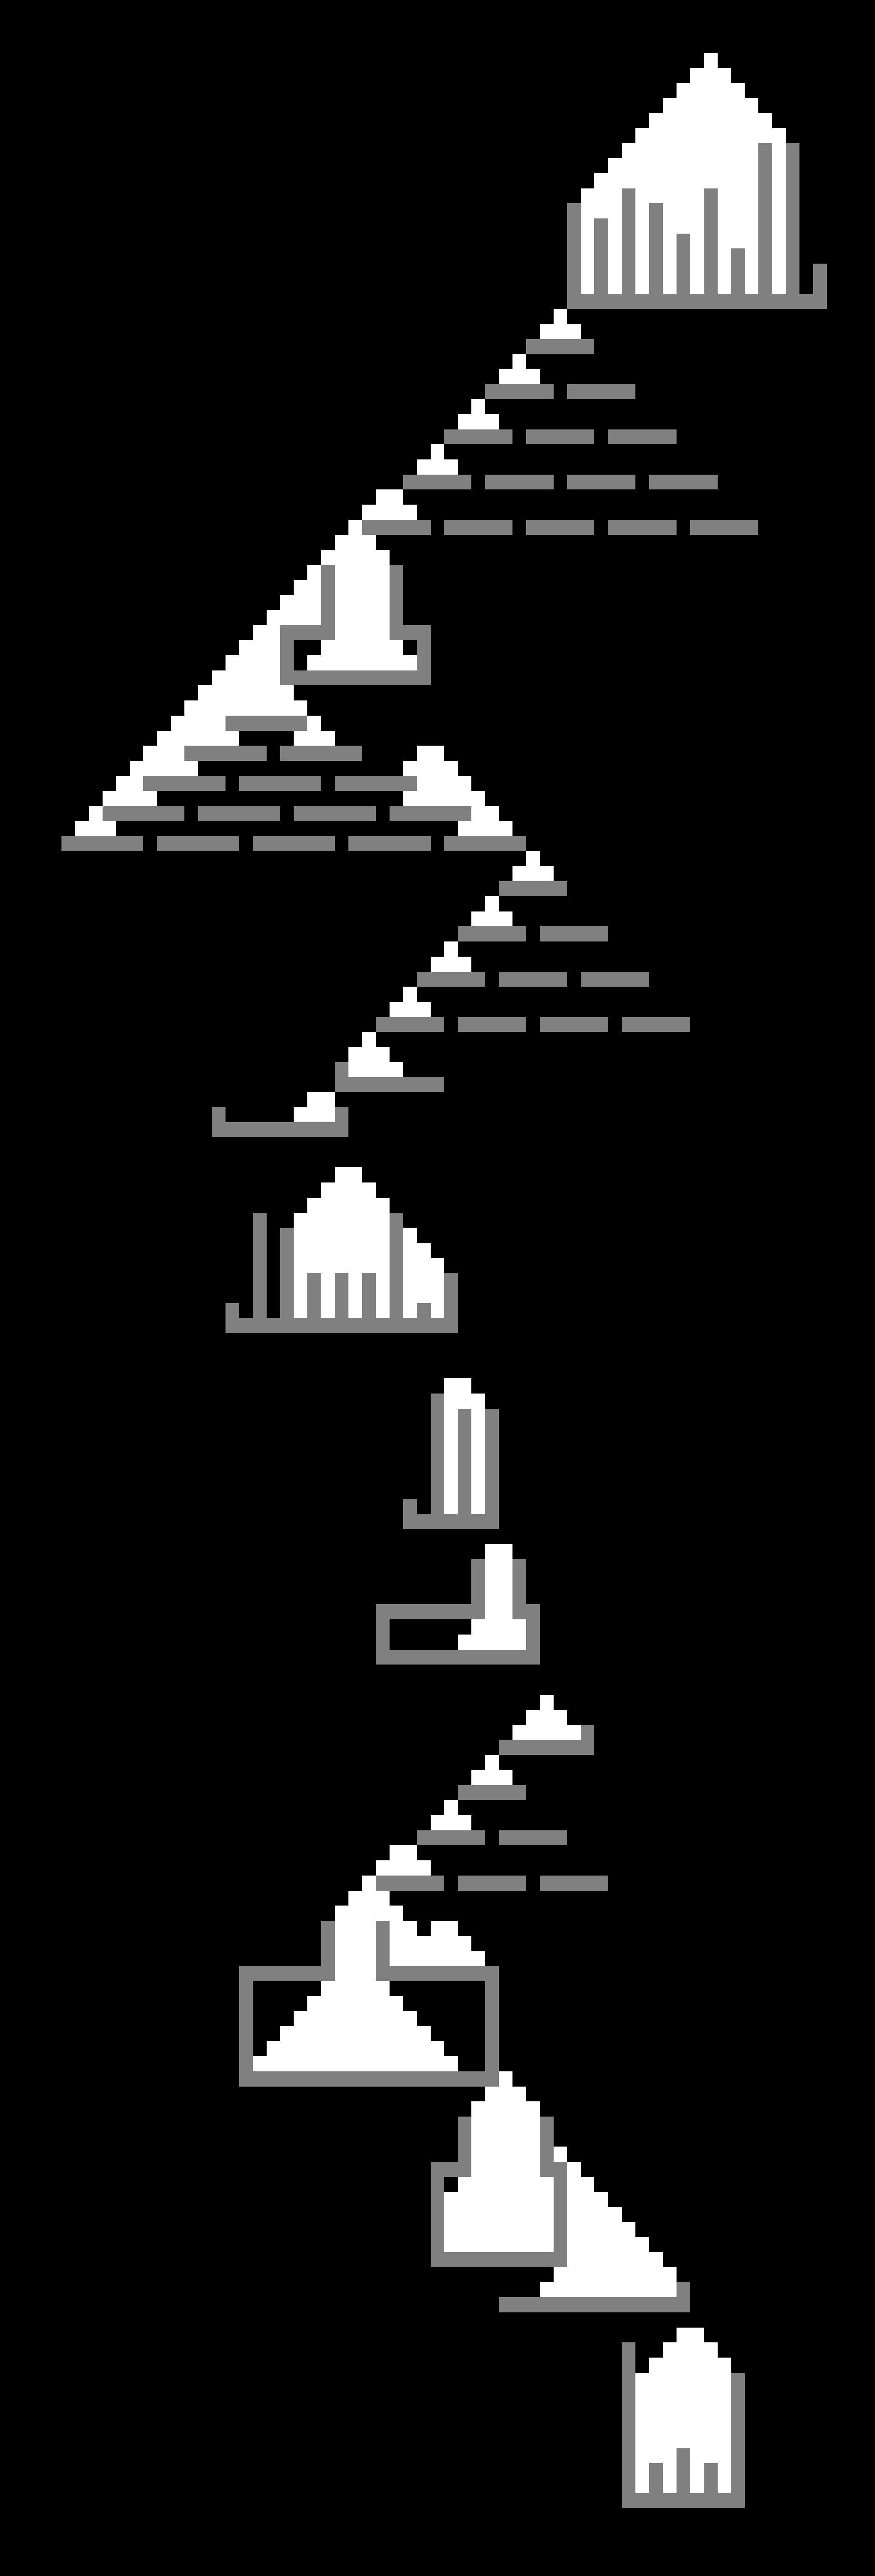

In [348]:
fig = pygmt.Figure()
nonzero = np.nonzero(g2)
xmin = nonzero[0].min()
xmax = nonzero[0].max()
ymin = nonzero[1].min()
ymax = nonzero[1].max()
margin = 5
xrgrid = xr.DataArray(g2[xmin-margin:xmax+margin, ymax+margin:ymin-margin:-1]).T
width = 20
aspect_ratio = (ymax-ymin)/(xmax-xmin)
proj = f'X{width}c/{width*aspect_ratio}c'
fig.grdimage(xrgrid, projection=proj, frame=False, cmap='gray')
fig.show(width=100)

In [350]:
print(xmin, xmax, ymin, ymax)

453 508 7 169


In [323]:
ymax

11

In [324]:
xmin

100

In [325]:
xmax

899

In [291]:
g2[93:107,0:15]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [296]:
ymin

13

In [297]:
ymax

171

In [298]:
xmin

0

In [299]:
xmax

999